# Steps to Perform Logistic Regression

## Import Libraries

In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.datasets import load_breast_cancer
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.decomposition import PCA

## Prepare the Data

In [101]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

## Reduce Input Features

In [103]:
# Reduce features to 2 dimensions for visualization using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

## Split data into training and testing sets

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

## Train The Model

In [107]:
# Initialize the model
model = LogisticRegression(max_iter=2000)  # max_iter is increased for convergence

# Train the model
model.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

## Make Prediction

In [109]:
# Predict on the test set
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class (1)
print("y Test: ",y_test.ravel())
print("y Predict: ",y_pred.ravel())
print("y Predict_Probability: ",y_pred_proba.ravel())

y Test:  [1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 0
 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1]
y Predict:  [1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 0 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 0 1 1 0 0 0 1 1 0 0 1 1 1 0 1 0 1 1 0 1 0 0
 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1]
y Predict_Probability:  [6.93937902e-01 2.20303902e-07 3.81898447e-03 9.86906614e-01
 9.89319997e-01 6.55548330e-06 2.42401540e-08 2.63761490e-02
 9.50161263e-01 8.73246252e-01 9.44616573e-01 3.77465049e-03
 8.86473802e-01 4.92249257e-01 9.61011846e-01 1.02860304e-01
 9.16561516e-01

C:\Users\HP ZBOOK 15 G3\AppData\Local\Temp\ipykernel_21508\2111921797.py:4: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  print("y Test: ",y_test.ravel())


In [147]:
y_pred_proba

array([6.93937902e-01, 2.20303902e-07, 3.81898447e-03, 9.86906614e-01,
       9.89319997e-01, 6.55548330e-06, 2.42401540e-08, 2.63761490e-02,
       9.50161263e-01, 8.73246252e-01, 9.44616573e-01, 3.77465049e-03,
       8.86473802e-01, 4.92249257e-01, 9.61011846e-01, 1.02860304e-01,
       9.16561516e-01, 9.95868370e-01, 9.98143231e-01, 1.85377619e-05,
       3.77941032e-01, 9.49395248e-01, 1.96112256e-07, 9.91303401e-01,
       9.87122284e-01, 9.79110410e-01, 9.57889246e-01, 9.95555891e-01,
       9.66061497e-01, 4.82323109e-07, 9.89901879e-01, 9.73319004e-01,
       9.86763327e-01, 5.63513882e-01, 9.92277443e-01, 9.71042703e-01,
       1.02072585e-02, 9.60547783e-01, 1.88641551e-05, 7.44463739e-01,
       9.90305632e-01, 2.42946694e-02, 9.85357649e-01, 9.48848320e-01,
       9.91428962e-01, 9.53405428e-01, 9.93444697e-01, 9.94242885e-01,
       9.31758495e-01, 9.65459774e-01, 1.36394632e-04, 9.73002416e-06,
       9.27161211e-01, 9.66057676e-01, 9.79238075e-01, 8.27468917e-01,
      

## Evaluate the Model

In [111]:
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9766081871345029
Confusion Matrix:
 [[ 60   3]
 [  1 107]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.97        63
           1       0.97      0.99      0.98       108

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



## Visualize the Result

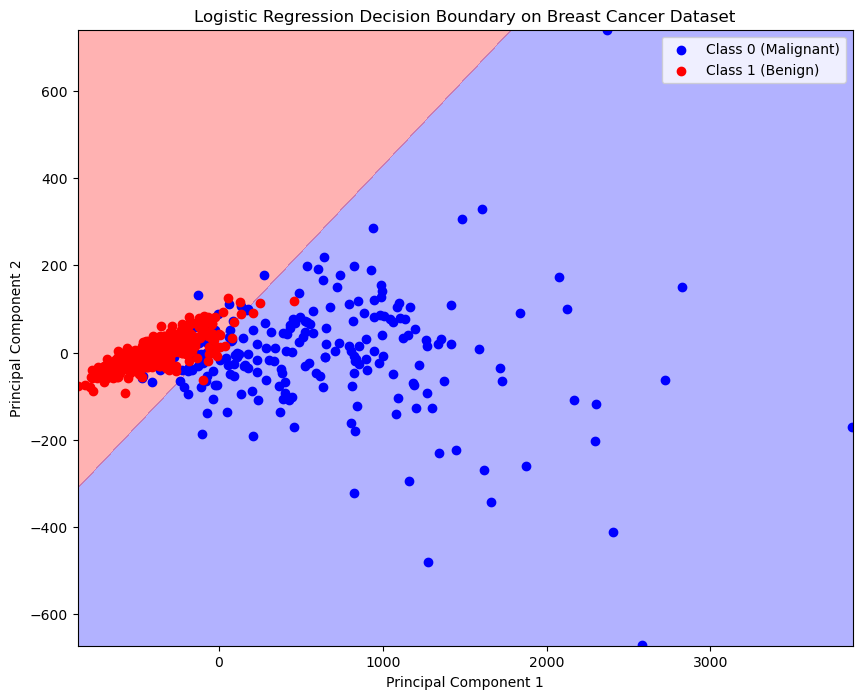

In [139]:
# Visualize decision boundary
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Predict probabilities for grid points
Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], colors=["blue", "red"], alpha=0.3)
plt.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], color="blue", label="Class 0 (Malignant)")
plt.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], color="red", label="Class 1 (Benign)")
plt.title("Logistic Regression Decision Boundary on Breast Cancer Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

In [145]:
Z

array([[6.16469799e-05, 3.70118218e-05, 2.22210637e-05, ...,
        1.97915815e-26, 1.18822438e-26, 7.13372585e-27],
       [9.04645577e-05, 5.43140419e-05, 3.26091522e-05, ...,
        2.90442171e-26, 1.74372355e-26, 1.04687684e-26],
       [1.32751450e-04, 7.97040281e-05, 4.78533187e-05, ...,
        4.26224931e-26, 2.55892058e-26, 1.53629552e-26],
       ...,
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        2.84879027e-10, 1.71032418e-10, 1.02682490e-10],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        4.18060997e-10, 2.50990688e-10, 1.50686924e-10],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        6.13506017e-10, 3.68329738e-10, 2.21133603e-10]])

In [114]:
s=1
d=2
n=10
g = np.linspace(0,s,n+1)
h = np.linspace(0,d,n+1)
print('g',g)
print('h',h)

g [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
h [0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2. ]


In [115]:
g

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [116]:
h

array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ])

In [117]:
j,k = np.meshgrid(g,h)

In [118]:
j.shape

(11, 11)

In [119]:
k.shape

(11, 11)

In [120]:
f = np.sin(2*j)*np.cos(k)

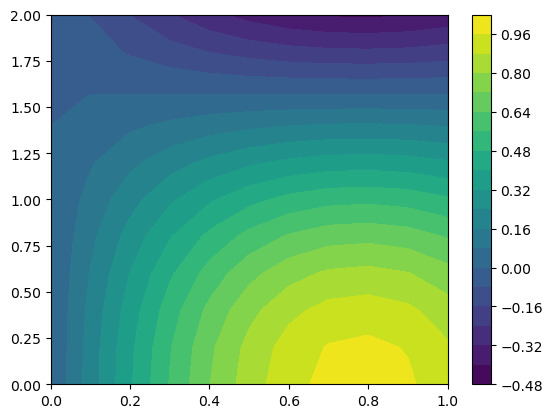

In [121]:
plt.contourf(j,k,f,levels = 20)
plt.colorbar()
plt.show()